In [1]:
import scipy.stats as scs
import pandas as pd
import numpy as np


def generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B'):
    """Returns a pandas dataframe with fake CTR data
    Example:
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
            Note: final sample size may not match N_A provided because the
            group at each row is chosen at random (50/50).
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        days (int): optional; if provided, a column for 'ts' will be included
            to divide the data in chunks of time
            Note: overflow data will be included in an extra day
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """

    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    group_bern = scs.bernoulli(0.5)

    # initiate bernoulli distributions to randomly sample from
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = idx // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        row['group'] = group_bern.rvs()

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)

    return df

In [2]:
sales = pd.read_csv("sales.csv")
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sales.loc[sales['Retailer country']=='United States', ['Revenue', 'Quantity', 'Gross profit']].head()

,Revenue,Quantity,Gross profit
0,5819.70,619.0,4086.50
2,10904.28,1068.0,7913.88
4,NaN,NaN,NaN
63,159492.97,16137.0,114309.37
65,159040.72,15773.0,114876.32


In [4]:
sales['Unit cost'].quantile([0.0, 0.25,0.5,0.75,1])

0.00       0.85
0.25       2.76
0.50       9.00
0.75      34.97
1.00    7833.00
Name: Unit cost, dtype: float64

In [5]:
def cat_gen(x):
    if pd.isnull(x):
        return np.nan
    elif x<=2.76:
        return "cheap"
    elif 2.76<x<=9.0:
        return "medium"
    elif 9.0<x<=34.97:
        return "moderate"
    else:
        return "expensive"
    
sales['Cost category'] = sales['Unit cost'].map(cat_gen)
sales['Cost category'].value_counts(dropna = True)

cheap        1644
medium       1520
expensive    1503
moderate     1378
Name: Cost category, dtype: int64

In [6]:
sales['Unit cost'] = sales['Unit cost'].astype('category')
sales.dtypes

Year                    int64
Product line           object
Product type           object
Product                object
Order method type      object
Retailer country       object
Revenue               float64
Planned revenue       float64
Product cost          float64
Quantity              float64
Unit cost            category
Unit price            float64
Gross profit          float64
Unit sale price       float64
Cost category          object
dtype: object

In [7]:
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price,Cost category
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105,medium
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210,medium
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320,medium
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sales.set_index('Year').head()

,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price,Cost category
Year,,,,,,,,,,,,,,
2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105,medium
2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210,medium
2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320,medium
2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sales.set_index(['Product line', 'Product type']).head()

Year                      Product  \
Product line   Product type                                          
Golf Equipment Golf Accessories  2004  Course Pro Golf and Tee Set   
               Golf Accessories  2004  Course Pro Golf and Tee Set   
               Golf Accessories  2005  Course Pro Golf and Tee Set   
               Golf Accessories  2005  Course Pro Golf and Tee Set   
               Golf Accessories  2006  Course Pro Golf and Tee Set   

                                Order method type Retailer country   Revenue  \
Product line   Product type                                                    
Golf Equipment Golf Accessories       Sales visit    United States   5819.70   
               Golf Accessories       Sales visit   United Kingdom       NaN   
               Golf Accessories       Sales visit    United States  10904.28   
               Golf Accessories       Sales visit   United Kingdom  27987.84   
               Golf Accessories       Sales visit    United States       NaN   

                                 Planned revenue  Product cost  Quantity  \
Product line   Product type                                                
Golf Equipment Golf Accessories          6586.16        1733.2     619.0   
               Golf Accessories              NaN           NaN       NaN   
               Golf Accessories         11363.52        2990.4    1068.0   
               Golf Accessories         28855.68        7593.6    2712.0   
               Golf Accessories              NaN           NaN       NaN   

                                Unit cost  Unit price  Gross profit  \
Product line   Product type                                           
Golf Equipment Golf Accessories       2.8       10.64       4086.50   
               Golf Accessories       NaN         NaN           NaN   
               Golf Accessories       2.8       10.64       7913.88   
               Golf Accessories       2.8       10.64      20394.24   
               Golf Accessories       NaN         NaN           NaN   

                                 Unit sale price Cost category  
Product line   Product type                                     
Golf Equipment Golf Accessories            5.105        medium  
               Golf Accessories              NaN           NaN  
               Golf Accessories           10.210        medium  
               Golf Accessories           10.320        medium  
               Golf Accessories              NaN           NaN

In [10]:
sales.columns

Index([u'Year', u'Product line', u'Product type', u'Product',
       u'Order method type', u'Retailer country', u'Revenue',
       u'Planned revenue', u'Product cost', u'Quantity', u'Unit cost',
       u'Unit price', u'Gross profit', u'Unit sale price', u'Cost category'],
      dtype='object')

In [11]:
hierarchical_sales = sales.groupby(['Product line','Product type']).count()
hierarchical_sales.head(10)

Year  Product  \
Product line             Product type                          
Camping Equipment        Cooking Gear          5880     5880   
                         Sleeping Bags         2682     2682   
Golf Equipment           Golf Accessories      1764     1764   
Mountaineering Equipment Climbing Accessories  3087     3087   
Outdoor Protection       First Aid             2205     2205   
                         Insect Repellents     2205     2205   

                                               Order method type  \
Product line             Product type                              
Camping Equipment        Cooking Gear                       5880   
                         Sleeping Bags                      2682   
Golf Equipment           Golf Accessories                   1764   
Mountaineering Equipment Climbing Accessories               3087   
Outdoor Protection       First Aid                          2205   
                         Insect Repellents                  2205   

                                               Retailer country  Revenue  \
Product line             Product type                                      
Camping Equipment        Cooking Gear                      5880     2059   
                         Sleeping Bags                     2682     1031   
Golf Equipment           Golf Accessories                  1764      619   
Mountaineering Equipment Climbing Accessories              3087      729   
Outdoor Protection       First Aid                         2205      812   
                         Insect Repellents                 2205      795   

                                               Planned revenue  Product cost  \
Product line             Product type                                          
Camping Equipment        Cooking Gear                     2059          2059   
                         Sleeping Bags                    1031          1031   
Golf Equipment           Golf Accessories                  619           619   
Mountaineering Equipment Climbing Accessories              729           729   
Outdoor Protection       First Aid                         812           812   
                         Insect Repellents                 795           795   

                                               Quantity  Unit cost  \
Product line             Product type                                
Camping Equipment        Cooking Gear              2053       2059   
                         Sleeping Bags              859       1031   
Golf Equipment           Golf Accessories           615        619   
Mountaineering Equipment Climbing Accessories       729        729   
Outdoor Protection       First Aid                  809        812   
                         Insect Repellents          795        795   

                                               Unit price  Gross profit  \
Product line             Product type                                     
Camping Equipment        Cooking Gear                2059          2059   
                         Sleeping Bags               1031          1031   
Golf Equipment           Golf Accessories             619           619   
Mountaineering Equipment Climbing Accessories         729           729   
Outdoor Protection       First Aid                    812           812   
                         Insect Repellents            795           795   

                                               Unit sale price  Cost category  
Product line             Product type                                          
Camping Equipment        Cooking Gear                     2059           2059  
                         Sleeping Bags                    1031           1031  
Golf Equipment           Golf Accessories                  619            619  
Mountaineering Equipment Climbing Accessories              729            729  
Outdoor Protection       First Aid                         812            812  
                 

In [12]:
h1 = hierarchical_sales.unstack(level = 'Product line')
h1

Year                 \
Product line         Camping Equipment Golf Equipment   
Product type                                            
Climbing Accessories               NaN            NaN   
Cooking Gear                    5880.0            NaN   
First Aid                          NaN            NaN   
Golf Accessories                   NaN         1764.0   
Insect Repellents                  NaN            NaN   
Sleeping Bags                   2682.0            NaN   

                                                                  \
Product line         Mountaineering Equipment Outdoor Protection   
Product type                                                       
Climbing Accessories                   3087.0                NaN   
Cooking Gear                              NaN                NaN   
First Aid                                 NaN             2205.0   
Golf Accessories                          NaN                NaN   
Insect Repellents                         NaN             2205.0   
Sleeping Bags                             NaN                NaN   

                               Product                 \
Product line         Camping Equipment Golf Equipment   
Product type                                            
Climbing Accessories               NaN            NaN   
Cooking Gear                    5880.0            NaN   
First Aid                          NaN            NaN   
Golf Accessories                   NaN         1764.0   
Insect Repellents                  NaN            NaN   
Sleeping Bags                   2682.0            NaN   

                                                                  \
Product line         Mountaineering Equipment Outdoor Protection   
Product type                                                       
Climbing Accessories                   3087.0                NaN   
Cooking Gear                              NaN                NaN   
First Aid                                 NaN             2205.0   
Golf Accessories                          NaN                NaN   
Insect Repellents                         NaN             2205.0   
Sleeping Bags                             NaN                NaN   

                     Order method type                       ...          \
Product line         Camping Equipment Golf Equipment        ...           
Product type                                                 ...           
Climbing Accessories               NaN            NaN        ...           
Cooking Gear                    5880.0            NaN        ...           
First Aid                          NaN            NaN        ...           
Golf Accessories                   NaN         1764.0        ...           
Insect Repellents                  NaN            NaN        ...           
Sleeping Bags                   2682.0            NaN        ...           

                                 Gross profit                     \
Product line         Mountaineering Equipment Outdoor Protection   
Product type                                                       
Climbing Accessories                    729.0                NaN   
Cooking Gear                              NaN                NaN   
First Aid                                 NaN              812.0   
Golf Accessories                          NaN                NaN   
Insect Repellents                         NaN              795.0   
Sleeping Bags                             NaN                NaN   

                       Unit sale price                 \
Product line         Camping Equipment Golf Equipment   
Product type                                            
Climbing Accessories               NaN            NaN   
Cooking Gear                    2059.0            NaN   
First Aid                          NaN            NaN   
Golf Accessories                   NaN          619.0   
Insect Repellents                  NaN            NaN   
Sleeping Bags             

In [13]:
h1.stack(0)

Product line                            Camping Equipment  Golf Equipment  \
Product type                                                                
Climbing Accessories Cost category                    NaN             NaN   
                     Gross profit                     NaN             NaN   
                     Order method type                NaN             NaN   
                     Planned revenue                  NaN             NaN   
                     Product                          NaN             NaN   
                     Product cost                     NaN             NaN   
                     Quantity                         NaN             NaN   
                     Retailer country                 NaN             NaN   
                     Revenue                          NaN             NaN   
                     Unit cost                        NaN             NaN   
                     Unit price                       NaN             NaN   
                     Unit sale price                  NaN             NaN   
                     Year                             NaN             NaN   
Cooking Gear         Cost category                 2059.0             NaN   
                     Gross profit                  2059.0             NaN   
                     Order method type             5880.0             NaN   
                     Planned revenue               2059.0             NaN   
                     Product                       5880.0             NaN   
                     Product cost                  2059.0             NaN   
                     Quantity                      2053.0             NaN   
                     Retailer country              5880.0             NaN   
                     Revenue                       2059.0             NaN   
                     Unit cost                     2059.0             NaN   
                     Unit price                    2059.0             NaN   
                     Unit sale price               2059.0             NaN   
                     Year                          5880.0             NaN   
First Aid            Cost category                    NaN             NaN   
                     Gross profit                     NaN             NaN   
                     Order method type                NaN             NaN   
                     Planned revenue                  NaN             NaN   
...                                                   ...             ...   
Golf Accessories     Unit cost                        NaN           619.0   
                     Unit price                       NaN           619.0   
                     Unit sale price                  NaN           619.0   
                     Year                             NaN          1764.0   
Insect Repellents    Cost category                    NaN             NaN   
                     Gross profit                     NaN             NaN   
                     Order method type                NaN             NaN   
                     Planned revenue                  NaN             NaN   
                     Product                          NaN             NaN   
                     Product cost                     NaN             NaN   
                     Quantity                         NaN             NaN   
                     Retailer country                 NaN             NaN   
                     Revenue                          NaN             NaN   
                     Unit cost                        NaN             NaN   
                     Unit price                       NaN             NaN   
                     Unit sale price                  NaN             NaN   
                     Year                             NaN             NaN   
Sleeping Bags        Cost category                 1031.0             NaN   
                     Gross profit                  1031.0             NaN

In [14]:
data = pd.read_csv("conversion_rates.csv")
data.head()

,converted,group
0,0,B
1,0,B
2,0,A
3,0,B
4,0,A


In [15]:
data.pivot_table(index = 'group', columns = 'converted', aggfunc= len)

converted,0,1
group,,
A,940,90
B,949,21


In [16]:
data.pivot_table(index = 'group', columns = 'converted', aggfunc= np.sum)

/home/poseidon/.local/lib/python2.7/site-packages/pandas/core/groupby/groupby.py:4315: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  stacked_values = np.vstack(map(np.asarray, values))


group
A
B


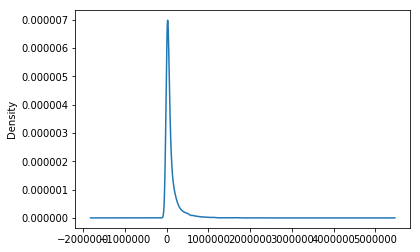

In [18]:
sales['Revenue'].plot(kind = 'kde')

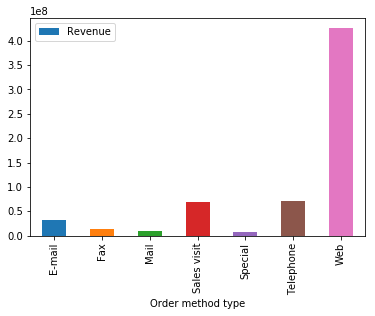

In [22]:
sales.groupby('Order method type').sum().plot(kind = 'bar', y = 'Revenue')

Year
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

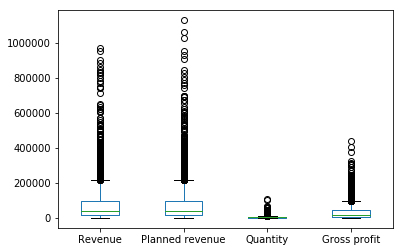

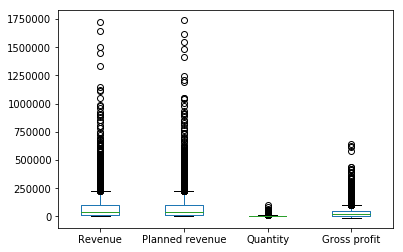

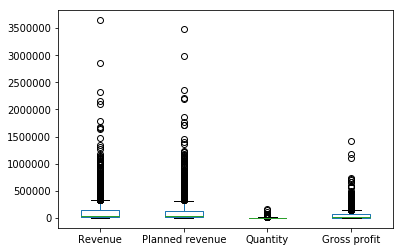

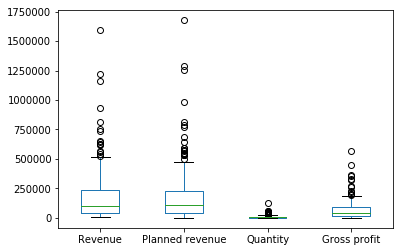

In [26]:
sales.groupby('Year')['Revenue', 'Planned revenue', 'Quantity', 'Gross profit'].plot(kind= 'box')

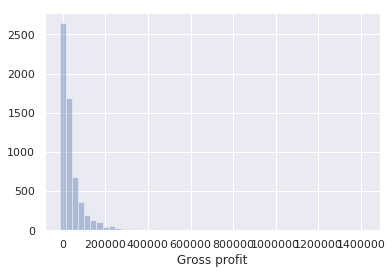

In [47]:
import seaborn as sns
sns.set()
sns.distplot(sales['Gross profit'].dropna(), kde = False)

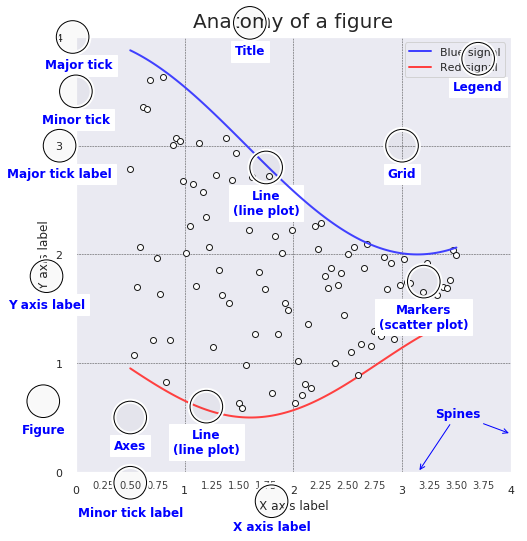

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(42)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))


plt.show()

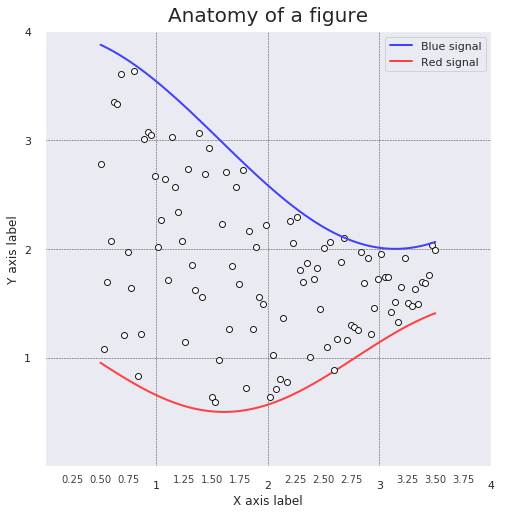

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(42)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

plt.axes().xaxis.set_major_locator(MultipleLocator(1.000))
plt.axes().xaxis.set_minor_locator(AutoMinorLocator(4))
plt.axes().yaxis.set_major_locator(MultipleLocator(1.000))
plt.axes().yaxis.set_minor_locator(AutoMinorLocator(4))
plt.axes().xaxis.set_minor_formatter(FuncFormatter(minor_tick))


plt.xticks([1.000, 2.000,3.000,4.000])
plt.yticks([1.000, 2.000,3.000,4.000])
plt.xlim(0, 4)
plt.ylim(0, 4)

plt.tick_params(which='major', width=1.0)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', width=1.0, labelsize=10)
plt.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

plt.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
plt.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
plt.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

plt.title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

plt.legend()

plt.show()